<a href="https://colab.research.google.com/github/BabritB/workings/blob/master/SummaryModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
from nltk.corpus import stopwords
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dropout,Dense,Bidirectional,LSTM,TimeDistributed,RepeatVector,Input,Embedding,concatenate,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [3]:
data=pd.read_csv('In_shots_Data.csv',encoding='latin1')
# As we can cleary see there is no null values:
# Now lets extract our Text Data and Summary Data:
filter_data=data[['Short','Headline']]

In [4]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [6]:
import nltk
nltk.download('stopwords')
table=str.maketrans('','',string.punctuation)
HTML_RE=re.compile(r'<[^>]+>')
STOP_WORDS=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
def text_cleaner(text):
    new_text=HTML_RE.sub('',text)
    new_text=' '.join([contraction_mapping[word] if word in contraction_mapping else word for word in new_text.split()])
    new_text=' '.join([word.translate(table).lower().strip() for word in new_text.split() if word not in STOP_WORDS])
    return new_text

In [8]:
filter_data['Short']=filter_data['Short'].apply(lambda x:text_cleaner(x))
filter_data['Headline']=filter_data['Headline'].apply(lambda x:text_cleaner(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
filter_data['Headline']=filter_data['Headline'].apply(lambda x:'sotok '+ x +' eotok')
filter_data['Summary']=filter_data['Headline']
filter_data['Text']=filter_data['Short']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [10]:
text_len=[]
summ_len=[]
for sent in filter_data['Text']:
    text_len.append(len(sent.split()))
for summ in filter_data['Summary']:
    summ_len.append(len(summ.split()))

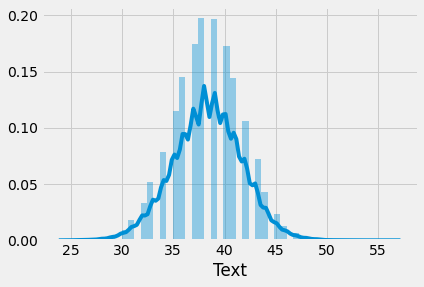

In [11]:
length_df=pd.DataFrame({'Text':text_len,'Summary':summ_len})
style.use('fivethirtyeight')
sns.distplot(length_df['Text'])

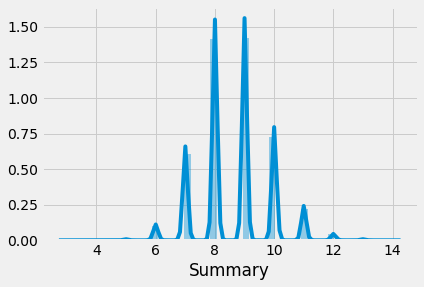

In [12]:
style.use('fivethirtyeight')
sns.distplot(length_df['Summary'])

In [13]:
max_len_text=50
max_len_summ=14

In [44]:
#Split the data:
X_train,X_test,y_train,y_test=train_test_split(filter_data['Text'][:500],filter_data['Summary'][:500],test_size=0.1,random_state=0)

In [45]:
text_tokenizer=Tokenizer()
text_tokenizer.fit_on_texts(list(X_train))
X_train_seq=text_tokenizer.texts_to_sequences(X_train)
X_test_seq=text_tokenizer.texts_to_sequences(X_test)
X_train_pad=pad_sequences(X_train_seq,maxlen=max_len_text,padding='post')
X_test_pad=pad_sequences(X_test_seq,maxlen=max_len_text,padding='post')

In [46]:
summ_tokenizer=Tokenizer()
summ_tokenizer.fit_on_texts(list(y_train))
y_train_seq=summ_tokenizer.texts_to_sequences(y_train)
y_test_seq=summ_tokenizer.texts_to_sequences(y_test)
y_train_pad=pad_sequences(y_train_seq,maxlen=max_len_summ,padding='post')
y_test_pad=pad_sequences(y_test_seq,maxlen=max_len_summ,padding='post')

In [47]:
text_vocab_size = len(text_tokenizer.word_index)
summary_vocab_size = len(summ_tokenizer.word_index)
encoder_input_data = X_train_pad
decoder_input_data = y_train_pad.reshape(y_train_pad.shape[0],y_train_pad.shape[1],1)[:, :-1]
decoder_output_data = y_train_pad.reshape(y_train_pad.shape[0],y_train_pad.shape[1],1)[:, 1:]

In [48]:
# 1. Define Encoder
input_seq_encoder = Input(shape = (None, ),name = "encoder_input")
embed_dim = 200
embedded_seq_encoder = Embedding(input_dim = text_vocab_size, output_dim = embed_dim)(input_seq_encoder)
encoder_lstm = LSTM(units = 256,activation = 'relu',return_sequences = False,return_state = True,name = "encoder_LSTM")
_, last_hidden_encoder, last_cell_encoder = encoder_lstm(embedded_seq_encoder)

# 2. Define Decoder
input_seq_decoder = Input(shape = (None,1),name = "decoder_input")
decoder_lstm = LSTM(units = 256,activation = 'relu',return_sequences = True,return_state = True,name = "decoder_LSTM")
all_hidden_decoder, _, _ = decoder_lstm(input_seq_decoder, initial_state = [last_hidden_encoder, last_cell_encoder])
decoder_dense = Dense(summary_vocab_size,   # NOT TIMEDISTRIBUTED (NOT RECURSIVE)
                      activation = 'softmax',
                      name = "decoder_dense")
logits = decoder_dense(all_hidden_decoder)

# 3. Define Model
final_rnn_model = Model(input = [input_seq_encoder, input_seq_decoder],output = logits)
#optimizer='rmsprop', loss='sparse_categorical_crossentropy'
final_rnn_model.compile(loss = sparse_categorical_crossentropy,optimizer = 'rmsprop',metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


In [49]:
final_rnn_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, None)         0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, None, 200)    1330200     encoder_input[0][0]              
__________________________________________________________________________________________________
decoder_input (InputLayer)      (None, None, 1)      0                                            
__________________________________________________________________________________________________
encoder_LSTM (LSTM)             [(None, 256), (None, 467968      embedding_6[0][0]                
____________________________________________________________________________________________

In [51]:
# 4. Fit the Model
history=final_rnn_model.fit([encoder_input_data, decoder_input_data],decoder_output_data,batch_size = 32,epochs = 100,
                    validation_split = 0.2)

Train on 360 samples, validate on 90 samples
Epoch 1/100
360/360 [==============================] - 2s 6ms/step - loss: 6.6606 - accuracy: 0.4835 - val_loss: nan - val_accuracy: 0.4248
Epoch 2/100
360/360 [==============================] - 2s 6ms/step - loss: 6.6490 - accuracy: 0.4850 - val_loss: nan - val_accuracy: 0.4248
Epoch 3/100
360/360 [==============================] - 2s 6ms/step - loss: 6.6273 - accuracy: 0.4904 - val_loss: nan - val_accuracy: 0.4111
Epoch 4/100
360/360 [==============================] - 2s 6ms/step - loss: 6.6454 - accuracy: 0.4857 - val_loss: nan - val_accuracy: 0.4299
Epoch 5/100
360/360 [==============================] - 2s 6ms/step - loss: 6.6157 - accuracy: 0.4912 - val_loss: nan - val_accuracy: 0.4265
Epoch 6/100
360/360 [==============================] - 2s 6ms/step - loss: 6.6039 - accuracy: 0.4923 - val_loss: nan - val_accuracy: 0.4188
Epoch 7/100
360/360 [==============================] - 2s 6ms/step - loss: 6.5663 - accuracy: 0.5026 - val_loss: na

In [52]:
# Inference Model Need to Prepare: